<a href="https://colab.research.google.com/github/s1c5000/Books/blob/main/handson/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

랜덤포레스트의 기본구성요소     
 하이퍼파라미터를 구분해서 가지를친다

분류, 회귀, 다중출력 가능   


In [ ]:
# 파이썬 ≥3.5 필수
import sys
# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

결정트리 실습

In [ ]:
#결정트리실습
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

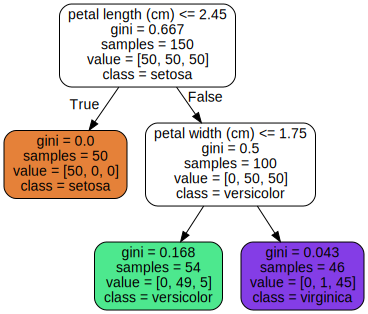

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

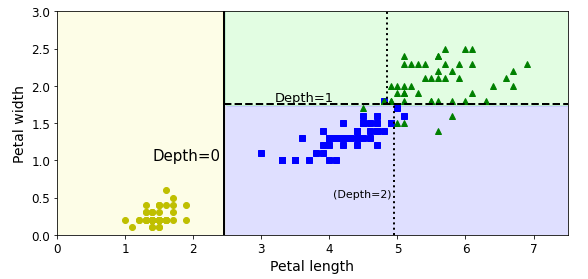

### 클래스 확률 추정

결정트리는 한 샘플이 특정 클래스 k 에 속할 확률을 추정할 수도 있다.     
먼저 이 샘플에 대하 리프 노드를 찾기위해 트리를 탐색하고 그 노드에 있는 클래스 k의 훈련샘플의 비율을 반환한다.

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

### CART훈련 알고리즘

결정트리를 훈련시키기위해 CART알고리즘을 사용한다.  
CART알고리즘이 훈련세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고 그 다음엔 서브셋의 서브셋을 나누고 이런 방식이다.  
CART알고리즘은 탐욕적알고리즘이다. 맨 위 루트노드에서 최적의 분할을 찾으며 이어지는 각 단계에서 이 과정을 반복한다.

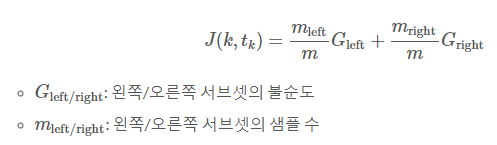

결정트리의 계산복잡도는 O(log(m))으로 매우 빠르다

### 규제 매개변수

트리가 과대적합되지않게 한다      
min_samples_split(분할되기 위해 노드가 가져야 하는 최소 샘플수)     
min_samples_leaf(리프 노드가 가지고 있어야 할 최소 샘플 수)     
min_wegith_fraction_leaf(min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율)          
max_leaf_nodes(리프노드의 최대수)       
max_features(각 노드에서 분할에 사용할 특성의 최대 수)

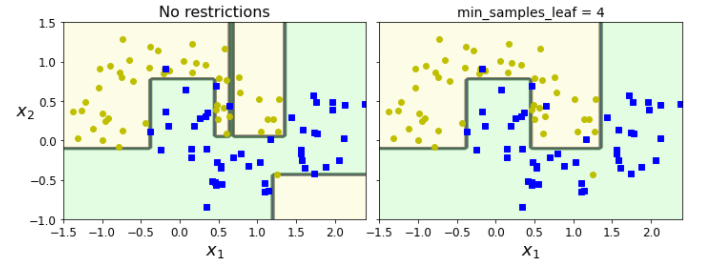

## 회귀

잡음이 섞인 2차 함수 형태의 데이터셋에서 max_depth=2 설정트로 회귀 트리를 만들어보겠다.

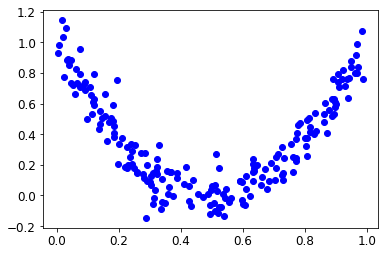

In [ ]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

plt.plot(X,y,'bo')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
print(X.shape)
#회귀선이 수직과 수평이기때문에 학습데이터의 범위를 넘어가면 
#학습데이터의 가장마지막값과 똑같은 값이 나온다.
print(tree_reg.predict([[7]]))

(200, 1)
[0.81069131]


만들어진 트리의 그림은 다음과 같다

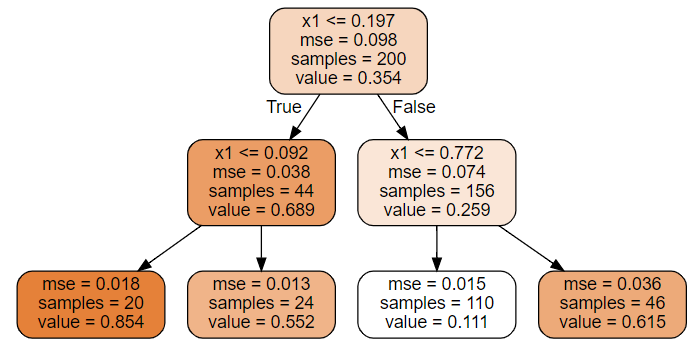

분류와 주요차이는 클래스를 예측하는대신 어떤 값을 예측한다는 것이다.

각 영역의 예측값은 항상 그 영역에 있는 타깃값의 평균이 된다. 알고르짐은 예측값과 가능한 많은 샘플이 가까이 있도록 영역을 분리한다.

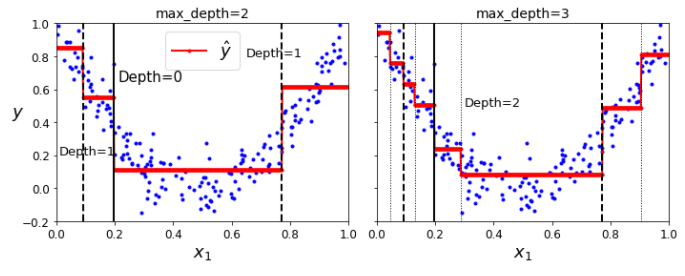

규제가 없다면 과적합 되기 쉽다.

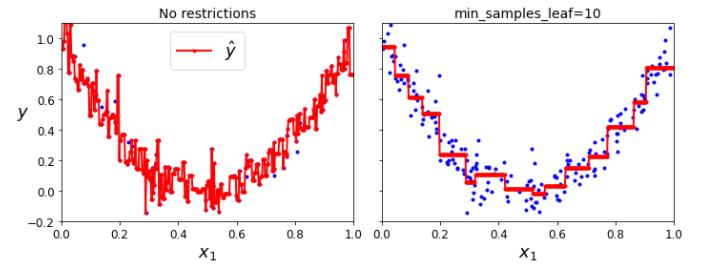

결정 트리는 회전에 민감하다  
훈련데이터를 더 좋은 방향으로 회전시키는 PCA기법을 사용하는것으로 해결  
랜덤포레스트로 불안정성을 극복가능하다  

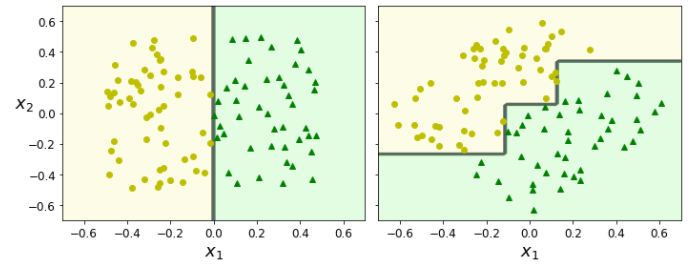